In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as snb

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
183,female,group D,associate's degree,standard,none,65,69,70
879,female,group D,associate's degree,standard,none,64,76,74
121,male,group B,associate's degree,standard,completed,91,89,92
522,male,group D,bachelor's degree,standard,none,69,58,57
469,male,group C,some college,standard,none,91,74,76


In [4]:
df.columns = ['gender', 'race', 'parentDegree', 'lunch', 'course', 'mathScore', 'readingScore', 'writingScore'] 
df

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.isna().sum()

gender          0
race            0
parentDegree    0
lunch           0
course          0
mathScore       0
readingScore    0
writingScore    0
dtype: int64

In [6]:
df['total'] = (df['mathScore']+df['readingScore']+df['writingScore'])/3
df.sample()

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore,total
951,female,group D,some college,standard,completed,75,77,83,78.333333


In [7]:
df.groupby(['race','parentDegree']).mean()

mathScore  readingScore  writingScore      total
race    parentDegree                                                        
group A associate's degree  61.000000     67.071429     63.571429  63.880952
        bachelor's degree   67.166667     68.083333     68.333333  67.861111
        high school         60.444444     62.888889     60.500000  61.277778
        master's degree     57.666667     64.666667     67.666667  63.333333
        some college        63.888889     65.777778     65.000000  64.888889
        some high school    58.916667     62.083333     58.583333  59.861111
group B associate's degree  66.097561     69.585366     68.243902  67.975610
        bachelor's degree   69.300000     72.950000     71.650000  71.300000
        high school         59.791667     63.458333     61.250000  61.500000
        master's degree     67.166667     80.166667     77.166667  74.833333
        some college        63.189189     65.756757     64.189189  64.378378
        some high school    61.815789     66.447368     64.605263  64.289474
group C associate's degree  66.730769     71.128205     70.269231  69.376068
        bachelor's degree   68.150000     75.675000     75.900000  73.241667
        high school         60.906250     64.421875     61.656250  62.328125
        master's degree     67.052632     70.526316     69.526316  69.035088
        some college        65.130435     69.420290     68.869565  67.806763
        some high school    60.551020     65.632653     63.285714  63.156463
group D associate's degree  67.600000     70.540000     69.860000  69.333333
        bachelor's degree   67.571429     70.142857     71.892857  69.869048
        high school         62.863636     64.409091     63.159091  63.477273
        master's degree     72.521739     77.173913     79.739130  76.478261
        some college        68.731343     70.880597     71.701493  70.437811
        some high school    66.760000     69.980000     69.100000  68.613333
group E associate's degree  74.897436     73.820513     73.205128  73.974359
        bachelor's degree   76.555556     74.833333     75.388889  75.592593
        high school         70.772727     70.318182     67.545455  69.545455
        master's degree     74.625000     82.125000     80.500000  79.083333
        some college        73.828571     72.628571     70.200000  72.219048
        some high school    72.111111     69.555556     66.555556  69.407407

In [8]:
df.groupby(['gender']).mean()

,mathScore,readingScore,writingScore,total
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [9]:
c_g = df.groupby(['gender','course']).mean().reset_index()
c_g

,gender,course,mathScore,readingScore,writingScore,total
0,female,completed,67.195652,77.375000,78.793478,74.454710
1,female,none,61.670659,69.982036,68.982036,66.878244
2,male,completed,72.339080,70.212644,69.793103,70.781609
3,male,none,66.688312,62.795455,59.649351,63.044372


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


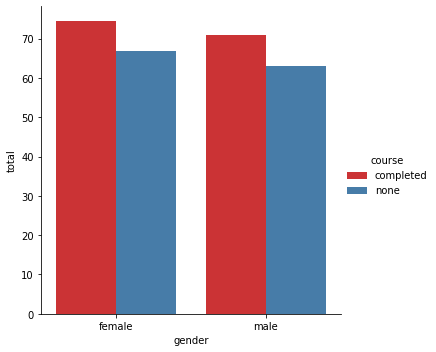

In [10]:
snb.factorplot(x='gender', y='total', hue='course', data=c_g, kind='bar', palette="Set1")

In [11]:
g_pD = df.groupby(['gender','parentDegree']).mean().reset_index()
g_pD

,gender,parentDegree,mathScore,readingScore,writingScore,total
0,female,associate's degree,65.250000,74.120690,74.000000,71.123563
1,female,bachelor's degree,68.349206,77.285714,78.380952,74.671958
2,female,high school,59.351064,68.202128,66.691489,64.748227
3,female,master's degree,66.500000,76.805556,77.638889,73.648148
4,female,some college,65.406780,73.550847,74.050847,71.002825
5,female,some high school,59.296703,69.109890,68.285714,65.564103
6,male,associate's degree,70.764151,67.433962,65.405660,67.867925
7,male,bachelor's degree,70.581818,68.090909,67.654545,68.775758
8,male,high school,64.705882,61.480392,58.539216,61.575163
9,male,master's degree,74.826087,73.130435,72.608696,73.521739


In [12]:
df.parentDegree.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parentDegree, dtype: int64

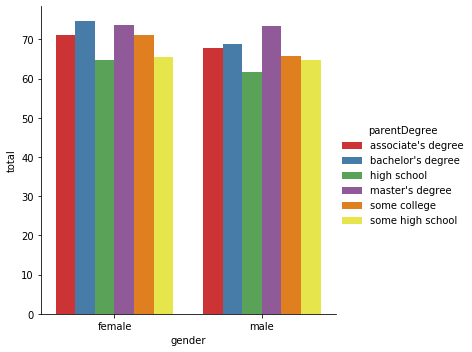

In [13]:
snb.factorplot(x='gender', y='total', hue='parentDegree', data=g_pD, kind='bar', palette="Set1")

In [14]:
l_c = df.groupby(['lunch','course']).mean().reset_index()
l_c

,lunch,course,mathScore,readingScore,writingScore,total
0,free/reduced,completed,63.045802,69.870229,70.351145,67.755725
1,free/reduced,none,56.508929,61.602679,58.736607,58.949405
2,standard,completed,73.533040,76.215859,76.766520,75.505140
3,standard,none,68.133971,69.177033,67.595694,68.302233


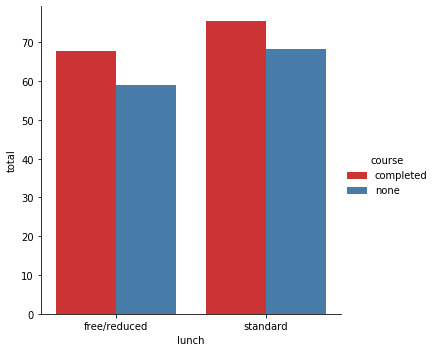

In [15]:
snb.factorplot(x='lunch', y='total', hue='course', data=l_c, kind='bar', palette="Set1")

In [16]:
r_g = df.groupby(['gender','race']).mean().reset_index()
r_g

,gender,race,mathScore,readingScore,writingScore,total
0,female,group A,58.527778,69.000000,67.861111,65.129630
1,female,group B,61.403846,71.076923,70.048077,67.509615
2,female,group C,62.033333,71.944444,71.777778,68.585185
3,female,group D,65.248062,74.046512,75.023256,71.439276
4,female,group E,70.811594,75.840580,75.536232,74.062802
5,male,group A,63.735849,61.735849,59.150943,61.540881
6,male,group B,65.930233,62.848837,60.220930,63.000000
7,male,group C,67.611511,65.424460,62.712230,65.249400
8,male,group D,69.413534,66.135338,65.413534,66.987469
9,male,group E,76.746479,70.295775,67.394366,71.478873


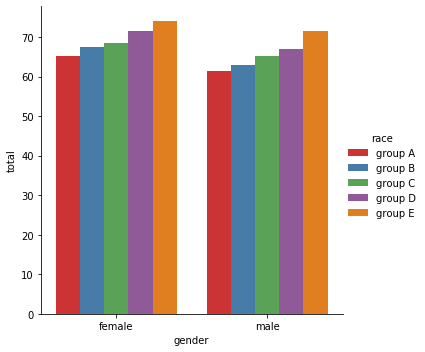

In [17]:
snb.factorplot(x='gender', y='total', hue='race', data=r_g, kind='bar', palette="Set1")

In [18]:
f_df = df.groupby(['gender','parentDegree','course','lunch','race']).mean().reset_index()
after_sort = f_df.sort_values(by= ['total'],ascending = False)
after_sort.drop(columns=['mathScore','readingScore','writingScore'],inplace = True)
after_sort

,gender,parentDegree,course,lunch,race,total
20,female,bachelor's degree,completed,free/reduced,group D,97.666667
21,female,bachelor's degree,completed,free/reduced,group E,97.333333
59,female,master's degree,completed,standard,group E,95.833333
111,male,associate's degree,completed,standard,group A,91.666667
14,female,associate's degree,none,standard,group A,89.333333
...,...,...,...,...,...,...
205,male,some high school,none,free/reduced,group D,48.833333
203,male,some high school,none,free/reduced,group B,48.333333
153,male,high school,none,free/reduced,group A,47.777778
97,female,some high school,none,free/reduced,group B,46.750000


In [19]:
print("Top Students\n",after_sort[:10])

Top Students
      gender        parentDegree     course         lunch     race      total
20   female   bachelor's degree  completed  free/reduced  group D  97.666667
21   female   bachelor's degree  completed  free/reduced  group E  97.333333
59   female     master's degree  completed      standard  group E  95.833333
111    male  associate's degree  completed      standard  group A  91.666667
14   female  associate's degree       none      standard  group A  89.333333
186    male        some college       none  free/reduced  group E  88.666667
127    male   bachelor's degree  completed  free/reduced  group B  88.333333
65   female     master's degree       none      standard  group B  88.166667
164    male     master's degree  completed  free/reduced  group D  87.666667
165    male     master's degree  completed      standard  group C  87.000000


In [20]:
print("Top worst Students\n",after_sort[-10:])

Top worst Students
      gender      parentDegree     course         lunch     race      total
206    male  some high school       none      standard  group A  51.083333
62   female   master's degree       none  free/reduced  group D  51.000000
193    male  some high school  completed  free/reduced  group B  50.333333
145    male       high school  completed  free/reduced  group C  50.222222
98   female  some high school       none  free/reduced  group C  49.857143
205    male  some high school       none  free/reduced  group D  48.833333
203    male  some high school       none  free/reduced  group B  48.333333
153    male       high school       none  free/reduced  group A  47.777778
97   female  some high school       none  free/reduced  group B  46.750000
154    male       high school       none  free/reduced  group B  44.733333
